<a href="https://colab.research.google.com/github/Adi77189/ML-Projects/blob/main/Rock_Vs_Mines_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Rock Vs Mines Prediction Model


**MODEL DESCRIPTION :We are building a system in Python that can predict whether an object is either Rock or Mine with SONAR Data. For this use case, We are using Logistic Regression Model for our prediction.**

In [ ]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay



In [ ]:
# reading the dataset
sonar_data=pd.read_csv('/content/Copy of sonar data.csv',header=None)

In [ ]:
sonar_data.head()
# Here 0-59 all columns are Sonar frequencies and 60th column is label/target

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [ ]:
# dataframe description statistical measure of all features
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [ ]:
#number of rows and columns
sonar_data.shape

(208, 61)

In [ ]:
# Give value count of labels/tragets
sonar_data[60].value_counts()

,count
60,
M,111
R,97


M-->Mines
R-->Rocks

In [ ]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [ ]:
# Separating labels and features
X=sonar_data.drop(columns=60,axis=1)
y=sonar_data[60]

In [ ]:
X.shape


(208, 60)

In [ ]:
y.shape

(208,)

**Training and Testing**

In [ ]:
#train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [ ]:
X_train.shape

(187, 60)

In [ ]:
X_test.shape

(21, 60)

**Model------>Logistic Regression**

In [ ]:
# Model Creation
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

**Model Evaluation**

In [ ]:
# ON training Data
X_train_predictions=model.predict(X_train)
train_data_accuracy=accuracy_score(X_train_predictions,y_train)

In [ ]:
train_data_accuracy

0.8716577540106952

In [ ]:
print(classification_report(X_train_predictions,y_train))

              precision    recall  f1-score   support

           M       0.90      0.87      0.88       104
           R       0.84      0.88      0.86        83

    accuracy                           0.87       187
   macro avg       0.87      0.87      0.87       187
weighted avg       0.87      0.87      0.87       187



In [ ]:
confusion_matrix(X_train_predictions,y_train)

array([[90, 14],
       [10, 73]])

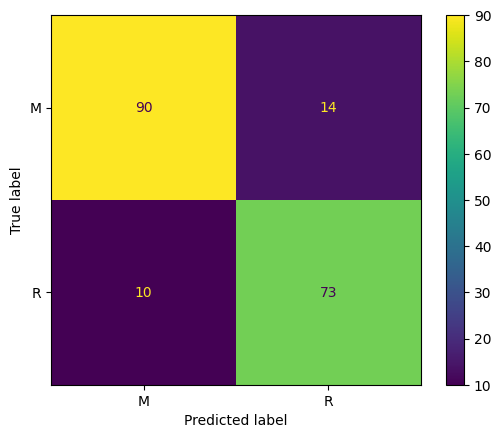

In [ ]:
ConfusionMatrixDisplay.from_predictions(X_train_predictions,y_train)

HERE in above curve we can see that our model is predicting 87 truly positive and 66 truley negative cases and 21 false positive cases and 13 false negative

In [ ]:
# On test Data
X_test_predictions=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_predictions,y_test)

In [ ]:
test_data_accuracy

0.8571428571428571

In [ ]:
print(classification_report(X_test_predictions,y_test))

              precision    recall  f1-score   support

           M       0.91      0.83      0.87        12
           R       0.80      0.89      0.84         9

    accuracy                           0.86        21
   macro avg       0.85      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21



In [ ]:
confusion_matrix(X_test_predictions,y_test)

array([[10,  2],
       [ 1,  8]])

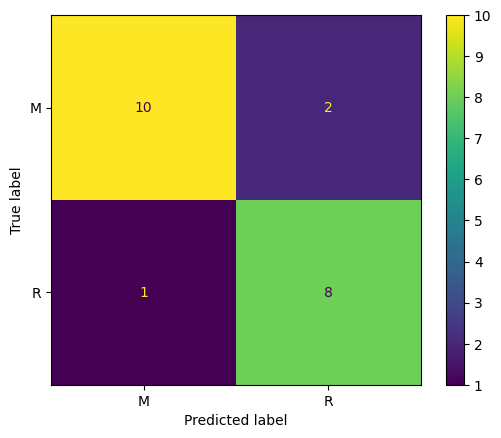

In [ ]:
ConfusionMatrixDisplay.from_predictions(X_test_predictions,y_test)


HERE in above curve we can see that our model is predicting 11 truly positive and 8 truley negative cases and 2 false positive cases and 0 false negative

**Make a predictive analysis**

In [ ]:
input_data=(0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
# Changing the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)
# reshape the np array as we are predicting for one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)
if prediction[0]=='R':
  print('The object is a Rock')
else:
  print('The object is a Mine')

['R']
The object is a Rock
